# Formation of Cooper pair (or Bardeen–Cooper–Schrieffer pair): A naive model

In [1]:
from sympy import symbols, Matrix, hessian, diag, Rational, re
import numpy as np
import matplotlib.pyplot as plt

# nuclei

In [2]:
X = Matrix(symbols("X1 X2 X3 X4 X5 X6 X7 X8 X9 X10"))

In [3]:
U_nuclei = 0

for n in range(len(X) - 1):
    U_nuclei += (X[n] - X[n+1]) ** 2 / 2
    
# periodic boundary
U_nuclei += (X[0] - X[-1]) ** 2 / 2

ponetial energy for nuclei as harmonic oscilator 

In [4]:
U_nuclei

(X1 - X10)**2/2 + (X1 - X2)**2/2 + (-X10 + X9)**2/2 + (X2 - X3)**2/2 + (X3 - X4)**2/2 + (X4 - X5)**2/2 + (X5 - X6)**2/2 + (X6 - X7)**2/2 + (X7 - X8)**2/2 + (X8 - X9)**2/2

RHS fo Newton's equation

In [5]:
hessian(U_nuclei, X) @ X

Matrix([
[ 2*X1 - X10 - X2],
[ -X1 + 2*X2 - X3],
[ -X2 + 2*X3 - X4],
[ -X3 + 2*X4 - X5],
[ -X4 + 2*X5 - X6],
[ -X5 + 2*X6 - X7],
[ -X6 + 2*X7 - X8],
[ -X7 + 2*X8 - X9],
[-X10 - X8 + 2*X9],
[-X1 + 2*X10 - X9]])

In [6]:
#plt.plot(np.sort(np.linalg.eigvals(np.array(hessian(U_nuclei, X), np.float))), '*')

# Electron-phonon coupling 

In [7]:
x = symbols("x1 x2")
V = symbols("V")

In [8]:
U_total = U_nuclei \
    +  V * (x[0] - X[0]) ** 2 / 2 + V * (x[1] - X[-1]) ** 2 / 2 - 0.1*(x[0] - x[1]) ** 2 /2

In [9]:
U_total

V*(-X1 + x1)**2/2 + V*(-X10 + x2)**2/2 + (X1 - X10)**2/2 + (X1 - X2)**2/2 + (-X10 + X9)**2/2 + (X2 - X3)**2/2 + (X3 - X4)**2/2 + (X4 - X5)**2/2 + (X5 - X6)**2/2 + (X6 - X7)**2/2 + (X7 - X8)**2/2 + (X8 - X9)**2/2 - 0.05*(x1 - x2)**2

In [10]:
Mass_inv  = diag(*(1 / 2000 for _ in X), *(1 for _ in x) )
Mass_inv

Matrix([
[0.0005,      0,      0,      0,      0,      0,      0,      0,      0,      0, 0, 0],
[     0, 0.0005,      0,      0,      0,      0,      0,      0,      0,      0, 0, 0],
[     0,      0, 0.0005,      0,      0,      0,      0,      0,      0,      0, 0, 0],
[     0,      0,      0, 0.0005,      0,      0,      0,      0,      0,      0, 0, 0],
[     0,      0,      0,      0, 0.0005,      0,      0,      0,      0,      0, 0, 0],
[     0,      0,      0,      0,      0, 0.0005,      0,      0,      0,      0, 0, 0],
[     0,      0,      0,      0,      0,      0, 0.0005,      0,      0,      0, 0, 0],
[     0,      0,      0,      0,      0,      0,      0, 0.0005,      0,      0, 0, 0],
[     0,      0,      0,      0,      0,      0,      0,      0, 0.0005,      0, 0, 0],
[     0,      0,      0,      0,      0,      0,      0,      0,      0, 0.0005, 0, 0],
[     0,      0,      0,      0,      0,      0,      0,      0,      0,      0, 1, 0],
[     0,      0,      0

In [11]:
RHS_Newton = Mass_inv @ hessian(U_total, list(X) + list(x))

In [12]:
v = np.linspace(0.15, 0.3, 100)

In [13]:
lowest_omega = [
    np.linalg.eigvals(np.array(RHS_Newton.subs({V:val}), np.float)).min() 
    for val in v 
]

critical V = 0.22121212


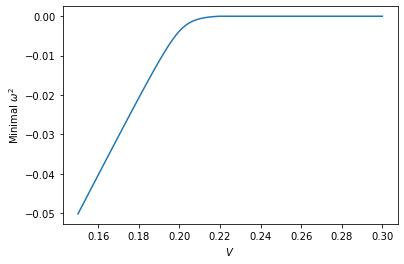

In [17]:
plt.plot(v, lowest_omega)
plt.xlabel('$V$')
plt.ylabel('Minimal $\omega^2$')
print("critical V = {:.8f}".format(v[np.argmax(np.array(lowest_omega) >  -1e-17)]))